# Prosper Loan Data Exploration
## by Harsh Gupta

## Preliminary Wrangling

The dataset used for this project is the **Prosper Loan Dataset**. The dataset contains data about the details of the various loans lent to the borrowers from Prosper. Each row in the dataset represents a loan, uniquely identified by the *Listing Key*.<br>
Every row in the dataset describes various attributes about the Borrower such as Employment Status, Credit Score, etc. Every row also describes other parameters such as Monthly Payments, On Time Payments, Interest Rate, etc.

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

### Data Gathering

In [2]:
# Importing Dataset
dataset = pd.read_csv('prosperLoanData.csv')

In [3]:
# Examining Dataset Head
dataset.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
print('Dataset Shape :', dataset.shape)

Dataset Shape : (113937, 81)


### Dataset Important Features
The following are some of the features that are important and will be used during the following analysis:
* Term: The length of the Loan in terms of months.
* LoanStatus: The current status of the loan.
* BorrowerRate: Borrower's Interest Rate on the loan.
* BorrowerState: The state in which the borrower resides. 
* EstimatedLoss: Estimated Principal loss.
* ProsperScore: Custom Risk Score
* CreditScoreRange: The upper and lower values of the Credit Score Range.
* ListingCategory: The category of the loan.
* BorrowerState: The state in which the borrower resides.
* Occupation: Borrower's occupation
* EmploymentStatus: Employment status, when listing was created.
* IsBorrowerHomeowner: Does the borrower own a home ?
* OriginalLoanAmount: The amount of the loan which was issued.
* MonthlyPayment: The monthly installment that is to be paid.
* LoanOriginationDate: The date at which the loan was issued. 
* StatedMonthlyIncome: The monthly income of the borrower stated at the time the loan was issued.

### Dataset Preprocessing

In [5]:
# Converting Loan Date from String to datetime64
dataset['LoanOriginationDate'] = dataset['LoanOriginationDate'].astype('datetime64')
# Extracting Year in which Loan Originated
dataset['LoanOriginationYear'] = pd.DatetimeIndex(dataset['LoanOriginationDate']).year

In [6]:
# Defining Function To Replace Listing Category Number with String
def replace_cat_num(numeric):
    list_dict = {0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement',
                 3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other',
                 8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
                 11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
                 14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',
                 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
    return list_dict[numeric]

# Adding Column to Dataframe for Category String
dataset['ListingCategory'] = dataset['ListingCategory (numeric)'].apply(replace_cat_num)
# Dropping Numeric Column
dataset.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [7]:
dataset.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginationYear,ListingCategory
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,1.0,0,0,0.0,258,2007,Not Available
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2014,Home Improvement
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,1.0,0,0,0.0,41,2007,Not Available
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,1.0,0,0,0.0,158,2012,Motorcycle
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,1.0,0,0,0.0,20,2013,Home Improvement


## Which states have the most and least number of borrowers ?
The state of **California**, is the state with the most number of borrowers, and **California, Texas and New York** are the top 3 states with the most number of borrowers.<br>
The state of **North Dakota** is the state with the least number of borrowers, and **Wyoming, Maine and North Dakota** are the 3 states with the least number of borrowers.

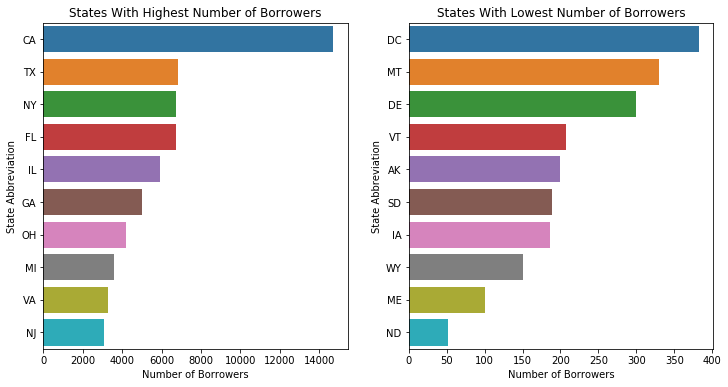

In [8]:
most_state_list = dataset['BorrowerState'].value_counts()[:10].index.tolist()
most_state_count = dataset['BorrowerState'].value_counts()[:10].values.tolist()

least_state_list = dataset['BorrowerState'].value_counts()[-10:].index.tolist()
least_state_count = dataset['BorrowerState'].value_counts()[-10:].values.tolist()

f,(ax1,ax2) = plt.subplots(ncols=2, sharey=False, sharex=False,
                          figsize=(12,6))

sns.barplot(x=most_state_count, y=most_state_list, ax=ax1)
ax1.set_title('States With Highest Number of Borrowers')
ax1.set_xlabel('Number of Borrowers')
ax1.set_ylabel('State Abbreviation')

sns.barplot(x=least_state_count, y=least_state_list, ax=ax2)
ax2.set_title('States With Lowest Number of Borrowers')
ax2.set_xlabel('Number of Borrowers')
ax2.set_ylabel('State Abbreviation')
plt.show()

## What was the most common reason for taking a loan ?
It can be observed that, most of the loans were categorised as **Debt Consolidation**. Some of the most common categories of loans are:
* Debt Consolidation
* Home Improvement
* Business 

However, many loans were listed in the categories of *Not Available and Other*, thus making it difficult to determine accurately which was the most common reason for taking a loan.

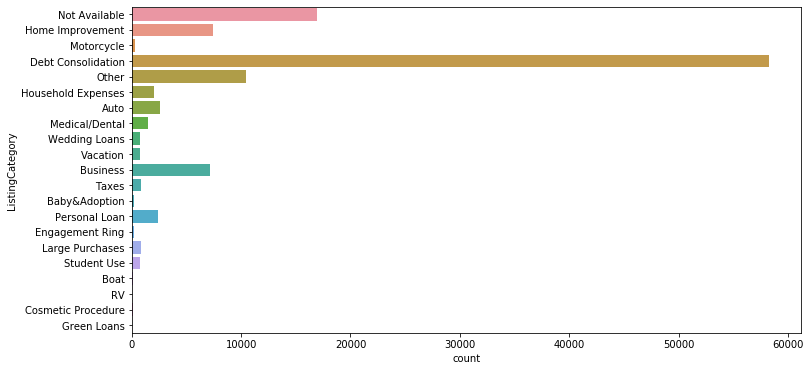

In [9]:
fig = plt.figure(figsize=(12,6))
sns.countplot(y='ListingCategory', data=dataset)

## How many of the borrowers own a home ?
It can be seen that there is almost a **50-50** distribution of borrowers who own a home, i.e almost half the borrowers own a home, whereas the other half do not own a home.

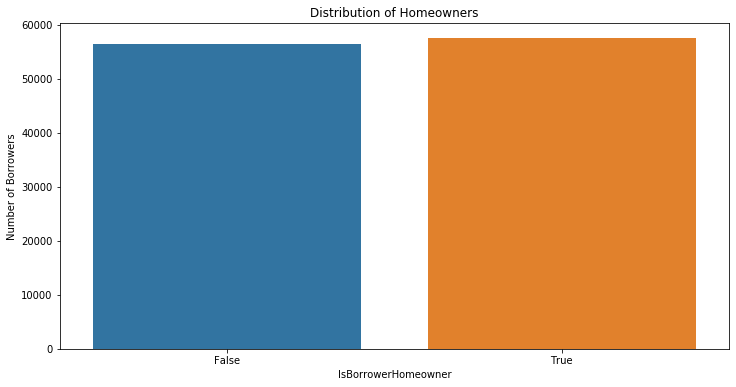

In [10]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='IsBorrowerHomeowner', data=dataset)
plt.title('Distribution of Homeowners')
plt.ylabel('Number of Borrowers')
plt.show()

## How many of the borrowers are employed ?
Most of the borrowers are **Employed**, with some of the borrowers being listed as *Not Available and Other*, whereas only a few of the borrowers were **Not Employed**.Also, some of the borrowers are also **Retired**. 

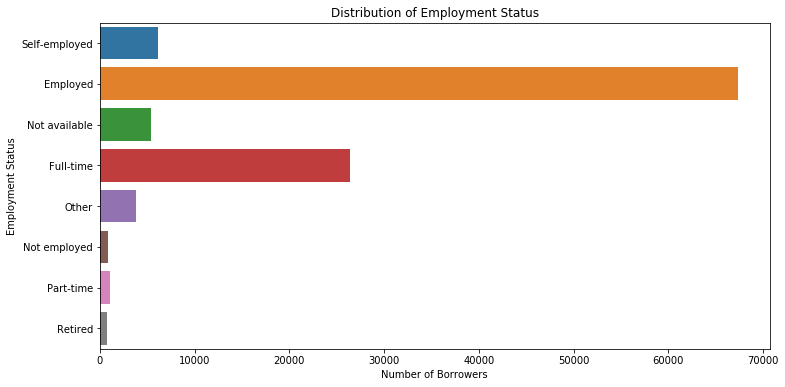

In [11]:
fig = plt.figure(figsize=(12,6))
sns.countplot(y='EmploymentStatus', data=dataset)
plt.title('Distribution of Employment Status')
plt.ylabel('Employment Status')
plt.xlabel('Number of Borrowers')
plt.show()

## In which year, the highest number of loans originated ?
The highest number of loans were originated in the year of **2013**, whereas the least number of loans originated in the year of **2005**.<br>
Additionally, it can also be seen that a positively increasing trend can be observed in the number of loan originations starting from the year **2009** to **2013**, which peaked in **2013**, and then the increase was interrupted. It can also be seen that the number of loans almost doubled every year in comparison to the previous year, for the year **2010 - 2013**. 

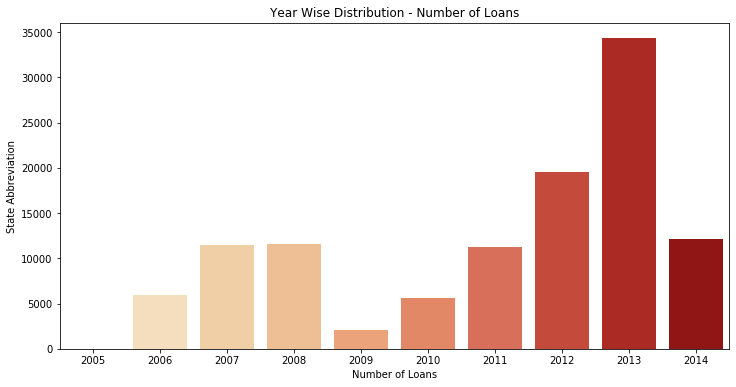

In [12]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='LoanOriginationYear', data=dataset, palette='OrRd')
plt.title('Year Wise Distribution - Number of Loans')
plt.xlabel('Number of Loans')
plt.ylabel('State Abbreviation')
plt.show()

## What is the distribution of Monthly Income of the Borrowers ?
The distribution cannot be clearly seen as there are many outliers in the income of the borrowers. It can be seen in the below distribution that monthly incomes above **10000** can be considered as *outliers*, and are thus removed from the dataset.<br>
Most of the borrowers in the dataset have an income between **3000** and **6000**.

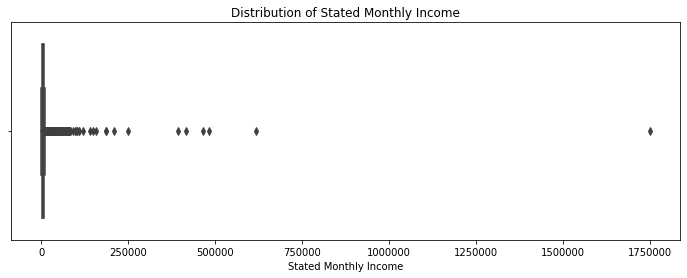

In [13]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(x='StatedMonthlyIncome', data=dataset)
plt.title('Distribution of Stated Monthly Income')
plt.xlabel('Stated Monthly Income')
plt.show()

In [14]:
# Removing Entries with Monthly Income > 250000
dataset = dataset[dataset['StatedMonthlyIncome'] < 10000]

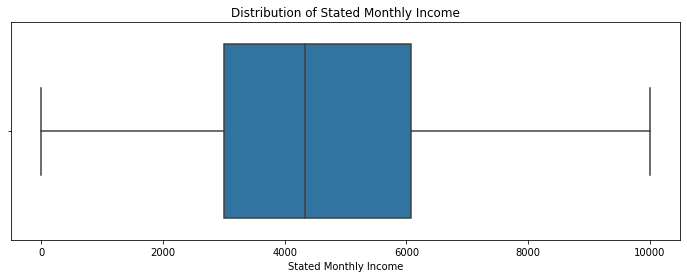

In [15]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(x='StatedMonthlyIncome', data=dataset)
plt.title('Distribution of Stated Monthly Income')
plt.xlabel('Stated Monthly Income')
plt.show()

## Which are Top 10 Most Common occupations of the borrowers ?
This question could not be answered with complete certainity as most of the borrower's occupations has been listed as **Other**.<br>
However based on the available data, it can be observed that the most common 3 occupations are:
* Professional
* Computer Programmer
* Teacher

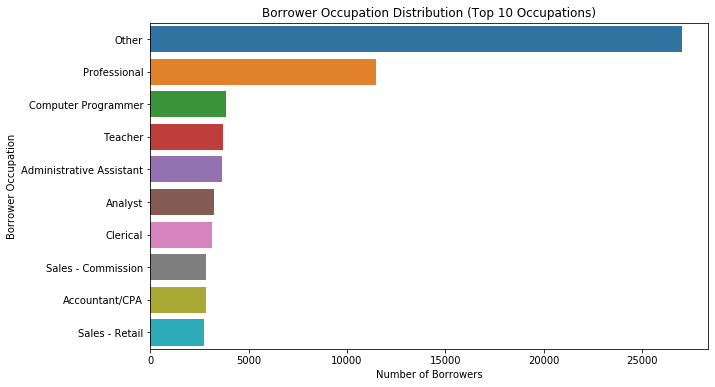

In [16]:
occp_list = dataset['Occupation'].value_counts()[:10].index.tolist()
occp_count = dataset['Occupation'].value_counts()[:10].values.tolist()

fig = plt.figure(figsize=(10,6))
sns.barplot(y=occp_list, x=occp_count)
plt.title('Borrower Occupation Distribution (Top 10 Occupations)')
plt.xlabel('Number of Borrowers')
plt.ylabel('Borrower Occupation')
plt.show()

## What is the distribution of Prosper Scores ?
The Prosper Score ranges from 1 - 11. It can be observed that most the borrowers were assigned Prosper Scores between the range of 4 - 8. The Prosper Score of **4** was the most commonly occuring prosper score in the dataset.

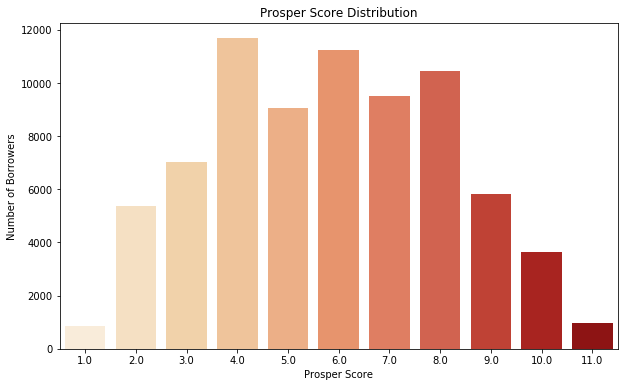

In [17]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='ProsperScore', data=dataset, palette='OrRd')
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score')
plt.ylabel('Number of Borrowers')
plt.show()

## What is the distribution of Credit Scores ?
From the Box Plot, it can be seen that most of the borrowers have a Credit Score in the range of **650 - 750**.<br>
Outliers have also been identified, with the Credit Scores range below 600 and above 800.

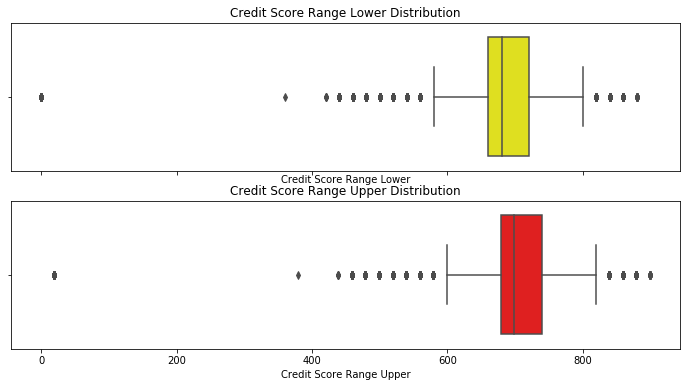

In [18]:
f,(ax1,ax2) = plt.subplots(nrows=2, sharey=False, sharex=True,
                          figsize=(12,6))
sns.boxplot(x='CreditScoreRangeLower', data=dataset, color='yellow', ax=ax1)
ax1.set_title('Credit Score Range Lower Distribution')
ax1.set_xlabel('Credit Score Range Lower')
sns.boxplot(x='CreditScoreRangeUpper', data=dataset, color='red', ax=ax2)
ax2.set_title('Credit Score Range Upper Distribution')
ax2.set_xlabel('Credit Score Range Upper')
plt.show()

## What is the distribution of the Loan Amount ?
Most of the loans that were given, are between 2,000 - 10,000, with loans are of amount > 25,000 are extremely rarely given.<br>
Additionally, loans of amount 10,000 and 15,000 also are very commonly issued.

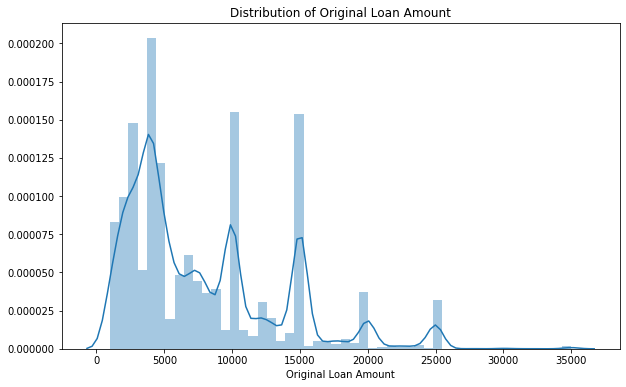

In [19]:
fig = plt.figure(figsize=(10,6))
sns.distplot(dataset['LoanOriginalAmount'], bins=50)
plt.title('Distribution of Original Loan Amount')
plt.xlabel('Original Loan Amount')
plt.show()

## What is the distribution of the Monthly Loan Payments ?
Most of the loans in the dataset have Monthly Loan Payments below the amount of 500 a month.

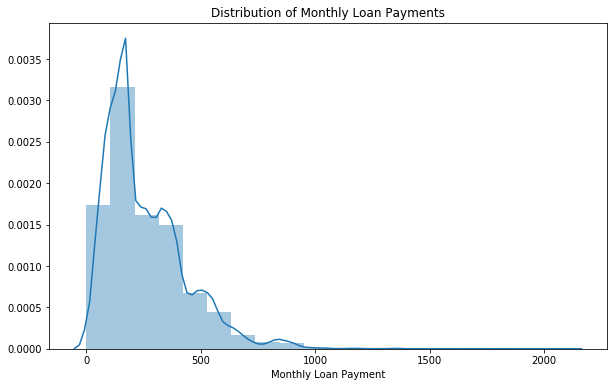

In [20]:
fig = plt.figure(figsize=(10,6))
sns.distplot(dataset['MonthlyLoanPayment'], bins=20)
plt.title('Distribution of Monthly Loan Payments')
plt.xlabel('Monthly Loan Payment')
plt.show()

## What is the most common duration for which Loans were taken ?
Majority of the loans in the dataset are taken for a period of **36 Months/3 Years**, with the loans for the duration of **12 Months** being very rare. Also, a smaller portion of the loans are also given for a duration of **60 Months/5 Years**.

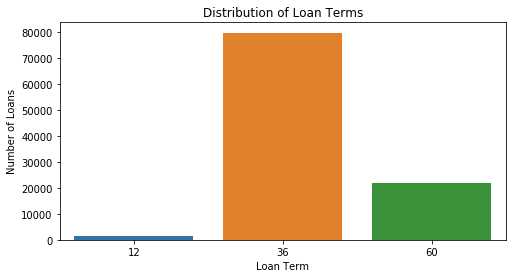

In [21]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='Term', data=dataset)
plt.title('Distribution of Loan Terms')
plt.xlabel('Loan Term')
plt.ylabel('Number of Loans')
plt.show()

## Does Higher Income Lead to Higher Prosper Scores ?
It can be observed that there is **Strong Positive Correlation** between Monthly Income and Prosper Score. **Higher the Monthly Income, Higher the Prosper Score**.

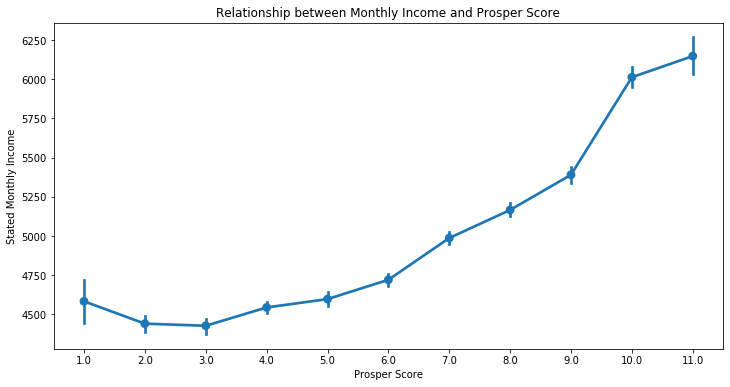

In [22]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='StatedMonthlyIncome', x='ProsperScore', data=dataset)
plt.title('Relationship between Monthly Income and Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Stated Monthly Income')
plt.show()

## Does Home Ownership lead to Higher Prosper Score ?
No Significant Difference can be observed in the distribution of the Prosper Score, for the borrowers who Own or Not Own a Home. However, an interesting pattern can be noticed, that the borrowers who have a *Lower Prosper Score*, the number of borrowers who **Dont Own a Home > Who Own a Home**. Whereas, for a *Higher Prosper Score*, the number of borrowers who **Own a Home > Dont Own a Home**. 

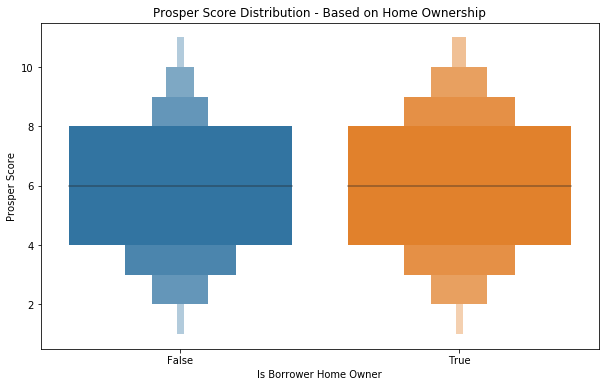

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxenplot(y='ProsperScore', x='IsBorrowerHomeowner', data=dataset)
plt.title('Prosper Score Distribution - Based on Home Ownership')
plt.xlabel('Is Borrower Home Owner')
plt.ylabel('Prosper Score')
plt.show()

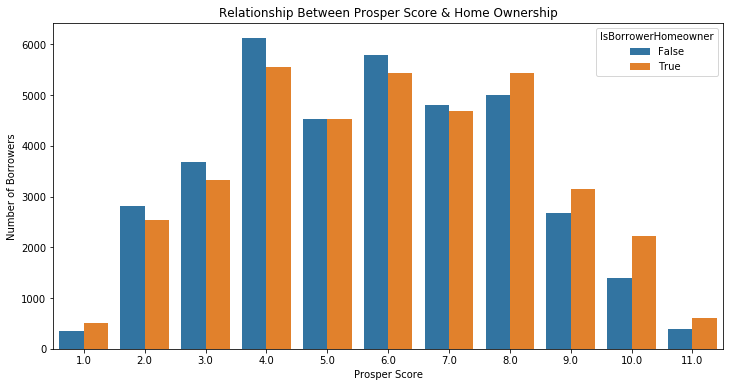

In [24]:
fig = plt.figure(figsize=(12,6))
sns.countplot(hue='IsBorrowerHomeowner', x='ProsperScore', data=dataset)
plt.title('Relationship Between Prosper Score & Home Ownership')
plt.ylabel('Number of Borrowers')
plt.xlabel('Prosper Score')
plt.show()

## How does the Loan Amount vary for the different categories of Loans ?

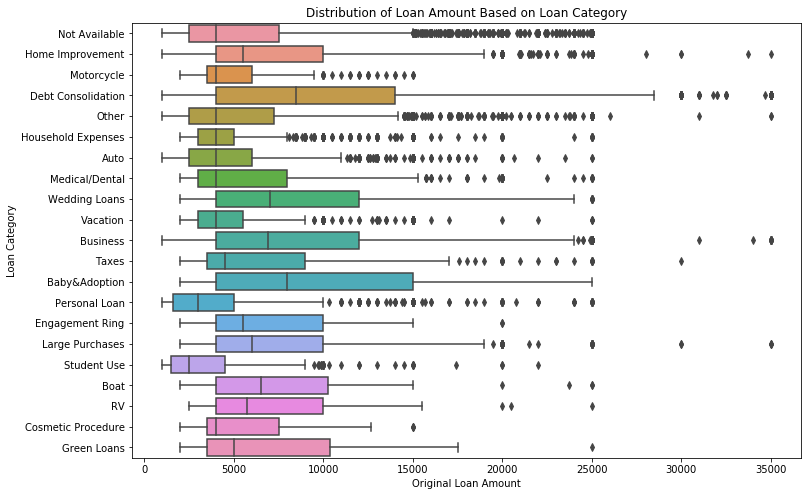

In [25]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='LoanOriginalAmount', y='ListingCategory', data=dataset)
plt.title('Distribution of Loan Amount Based on Loan Category')
plt.ylabel('Loan Category')
plt.xlabel('Original Loan Amount')
plt.show()

## Does the Employment Status affect the Amount of Loan Taken ?
It can be observed that the borrowers who are **Employed**, haves Loans of Higher Amounts when compared to borrowers with other categories of employment. <br>
Whereas, borrowers who are **Retired & Not Employed**, have taken loans of Lower Amounts when compared with other Employment categories.

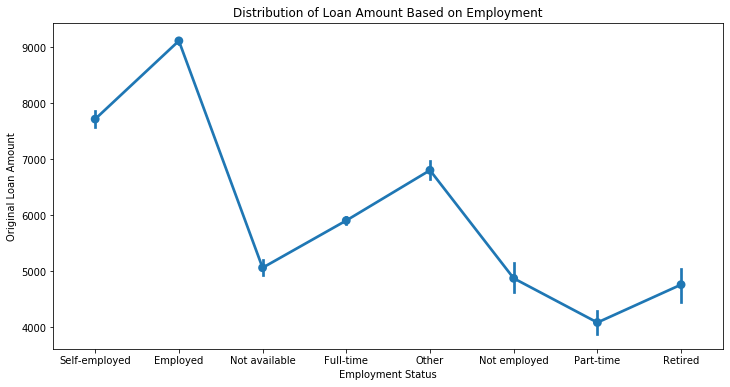

In [26]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='LoanOriginalAmount', x='EmploymentStatus', data=dataset)
plt.title('Distribution of Loan Amount Based on Employment')
plt.xlabel('Employment Status')
plt.ylabel('Original Loan Amount')
plt.show()

## How does Borrower's Employment affect the Loan Interest Rate ?
A clear relationship can be observed between Employment Status and Loan Interest Rate. Borrower's who are **Not Employed**, have been charged the Highest Interest Rate, where borrowers who are **Employed Full-Time/Part-Time** are offered the minimum Interest Rate. 

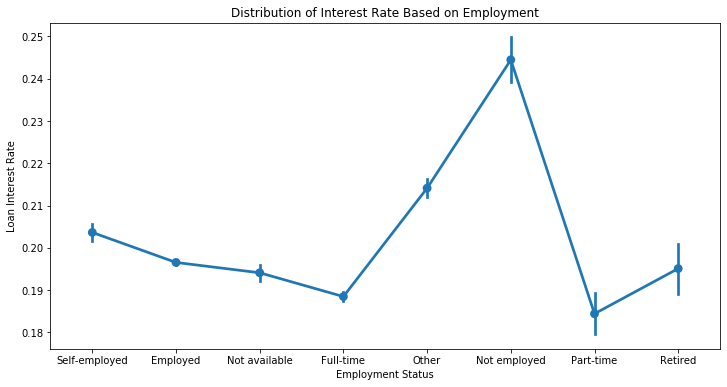

In [27]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='BorrowerRate', x='EmploymentStatus', data=dataset)
plt.title('Distribution of Interest Rate Based on Employment')
plt.xlabel('Employment Status')
plt.ylabel('Loan Interest Rate')
plt.show()

## Does being Employed lead to having a Higher Prosper Score ?
It can be observed that most of the Borrowers who are **Employed either Full Time/Part Time**, have a higher range of Prosper Scores when compared to Borrowers who are **Not Employed**.<br>
Suprisingly, Borrowers who are **Retired**, have also have a similar range of Prosper Scores to Borrowers who are employed **Part-Time**.

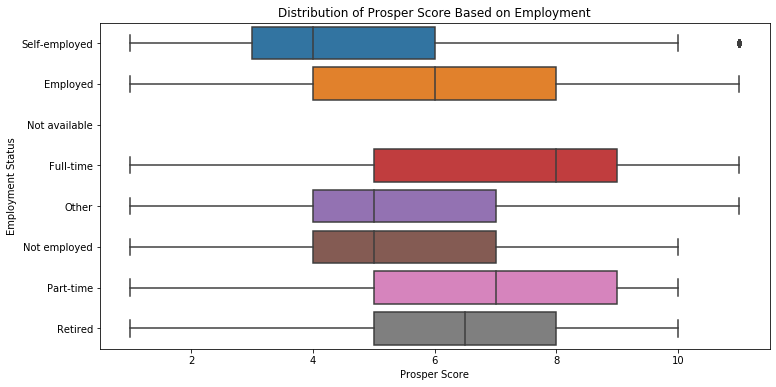

In [28]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(x='ProsperScore', y='EmploymentStatus', data=dataset)
plt.title('Distribution of Prosper Score Based on Employment')
plt.ylabel('Employment Status')
plt.xlabel('Prosper Score')
plt.show()

## Does the Interest Rate depend on Borrower's Prosper Score ?
A **High Correlation** can be observed between the Interest Rate and Borrower's Prosper Score.<br>
Relationship: **Higher Prosper Score -> Lower Interest Rate** and vice-versa.

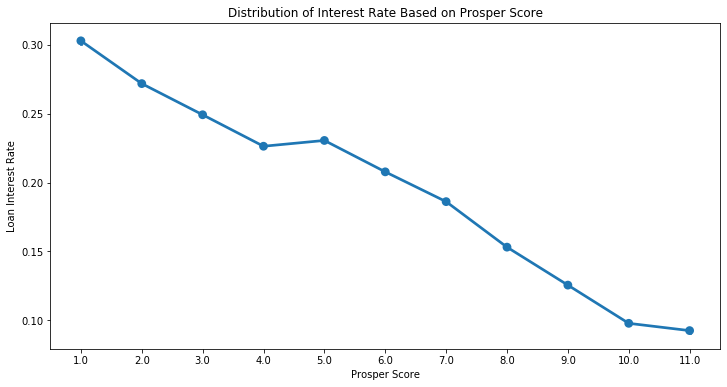

In [29]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='BorrowerRate', x='ProsperScore', data=dataset)
plt.title('Distribution of Interest Rate Based on Prosper Score')
plt.ylabel('Loan Interest Rate')
plt.xlabel('Prosper Score')
plt.show()

## Has the Loan Amounts given increased over the years ?
A Positive Trend can be observed in the Loan Amounts over the years. From the year **2009** a continuing increase has been observed in the Loan Amount being given.

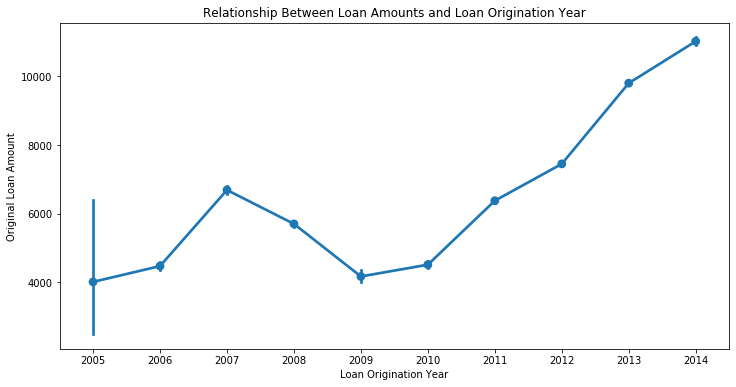

In [30]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='LoanOriginalAmount', x='LoanOriginationYear',
            data=dataset)
plt.title('Relationship Between Loan Amounts and Loan Origination Year')
plt.ylabel('Original Loan Amount')
plt.xlabel('Loan Origination Year')
plt.show()

## Do Higher Duration of Loans indicate Higher Loan Amounts ?
This relation is proved to be true, it can be clearly observed that for the majority of the loans, Higher Duration Loans have a higher range of Loan Amounts. 

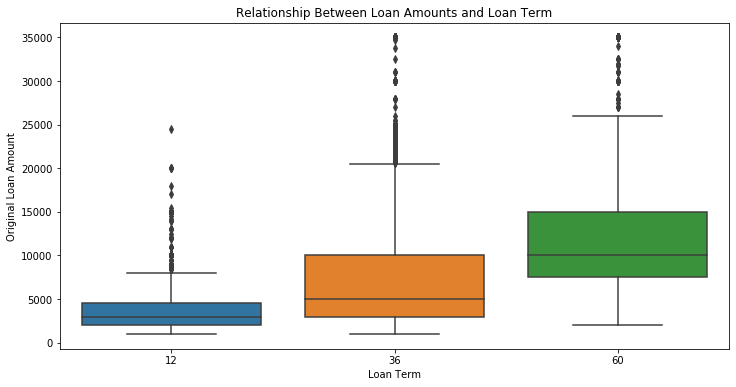

In [31]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(y='LoanOriginalAmount', x='Term',
            data=dataset)
plt.title('Relationship Between Loan Amounts and Loan Term')
plt.ylabel('Original Loan Amount')
plt.xlabel('Loan Term')
plt.show()

## Are Borrowers with Higher Prosper Score more likely to pay on time ?
It can be clearly seen that the Borrowers with **Higher Prosper Score**, have higher number of **On Time Monthly Payments**. This relation holds true for all Prosper Scores other than Prosper Score of 2, which can be observed as an exception to the pattern, wherein the Borrowers with this score, have lower number of On-Time payments when compared to borrowers with a Lower Prosper Score. 

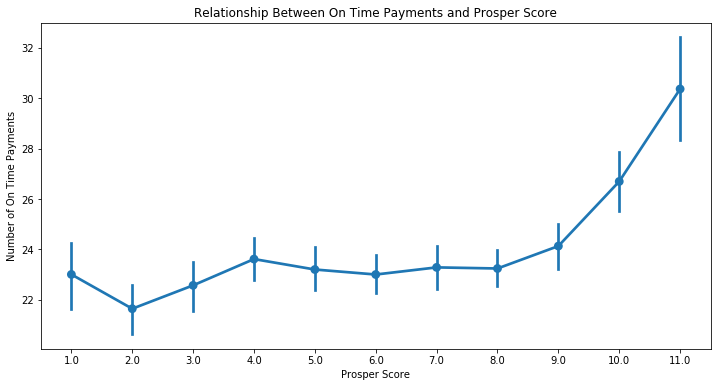

In [32]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='OnTimeProsperPayments', x='ProsperScore',
            data=dataset)
plt.title('Relationship Between On Time Payments and Prosper Score')
plt.ylabel('Number of On Time Payments')
plt.xlabel('Prosper Score')
plt.show()

## Is Prosper Score dependent on Credit Score ?
A Strong Relationship between Credit Score and Prosper Score can be observed. It can be seen that **Higher Credit Score leads to a Higher Prosper Score**.

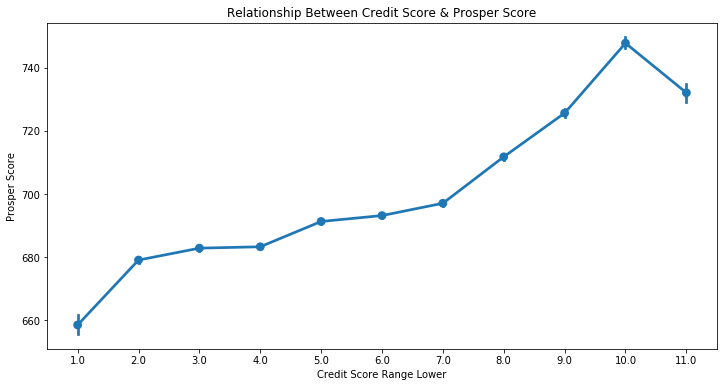

In [33]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(y='CreditScoreRangeLower', x='ProsperScore',data=dataset)
plt.title('Relationship Between Credit Score & Prosper Score')
plt.ylabel('Prosper Score')
plt.xlabel('Credit Score Range Lower')
plt.show()

## Do Loans given to Borrower's with Higher Score have a lower Loss ?
A **Strong Negative Correlation** can be seen between Estimated Loss and Prosper Score. The Loans given to Borrower's with Higher Prosper Score, have a Lower Estimated Loss. 

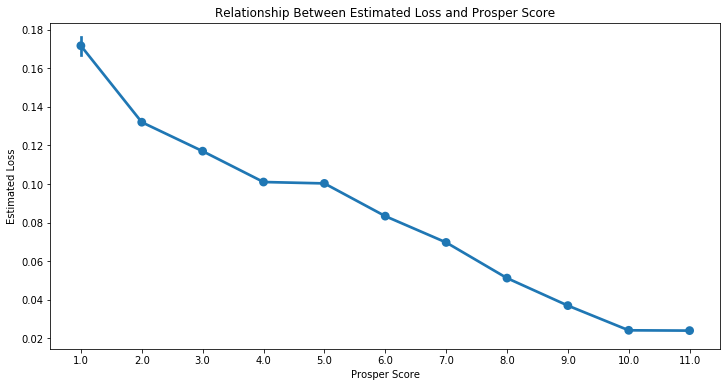

In [34]:
fig = plt.figure(figsize=(12,6))
sns.pointplot(x='ProsperScore', y='EstimatedLoss', data=dataset)
plt.title('Relationship Between Estimated Loss and Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Estimated Loss')
plt.show()

## Does the Prosper Score affect the Loan Amount or Monthly Payments ?
A relationship can be observed between Monthly Payments and Loan Amount. **Higher Loan Amount** leads to **Higher Monthly Payments**. However, no effect of Prosper Score can be seen on either, as neither does Higher Prosper Score lead to Higher Loan Amount or Monthly Amount nor vice-versa.

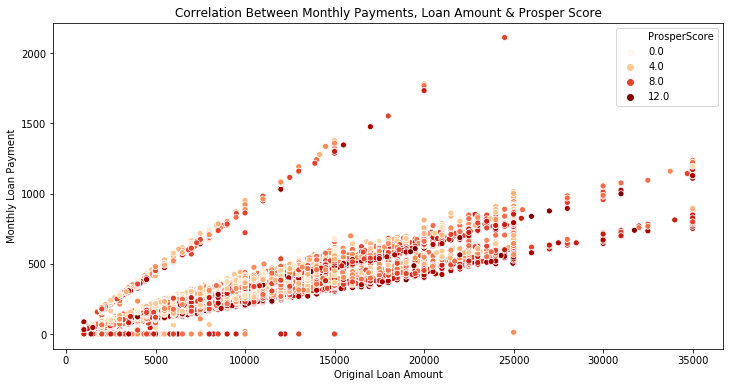

In [35]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='LoanOriginalAmount', y='MonthlyLoanPayment',
               data=dataset, hue='ProsperScore', palette='OrRd')
plt.title('Correlation Between Monthly Payments, Loan Amount & Prosper Score')
plt.ylabel('Monthly Loan Payment')
plt.xlabel('Original Loan Amount')
plt.show()

## Does the number of On-Time Payments and Delinquencies relate to the number of loans taken ?
It can be seen with Borrower's having Fewer Current Delinquencies and Higher On-Time Payments, are likely to have higher number of loans when compared to borrower's with Higher Current Delinquencies and Fewer On-Time Payments.

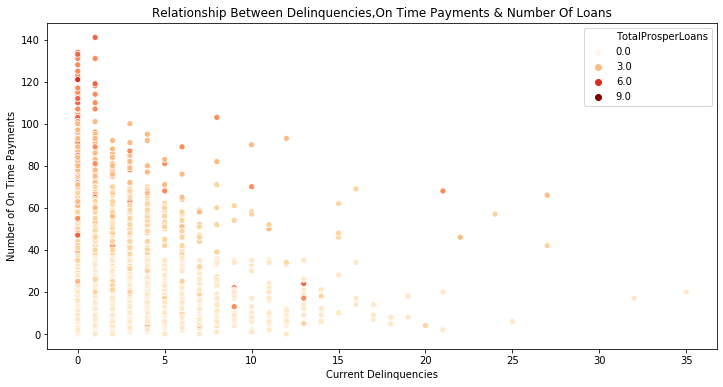

In [36]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='CurrentDelinquencies', y='OnTimeProsperPayments',
                hue='TotalProsperLoans', data=dataset, palette='OrRd')
plt.title('Relationship Between Delinquencies,On Time Payments & Number Of Loans')
plt.xlabel('Current Delinquencies')
plt.ylabel('Number of On Time Payments')
plt.show()

## What is the relationship between Interest Rate, Yield and Estimated Loss ?
It can be seen that a **Strong Positive Correlation** between Interest Rate, Yield and Estimated Loss. It can be seen that with the Increase in Interest, both Yield and Estimated Loss increase in the same proportion. 

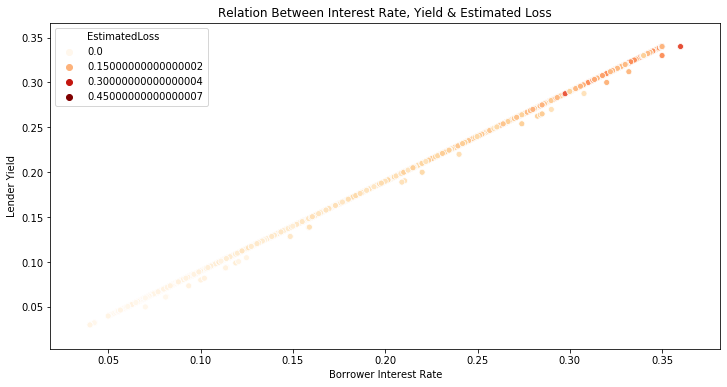

In [37]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='BorrowerRate', y='LenderYield',
                hue='EstimatedLoss',y_jitter=0.9, data=dataset,
               palette='OrRd')
plt.title('Relation Between Interest Rate, Yield & Estimated Loss')
plt.xlabel('Borrower Interest Rate')
plt.ylabel('Lender Yield')
plt.show()